In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
# Replace 'your_excel_file.xlsx' with the actual file path
excel_file_path = '/content/drive/MyDrive/dataset/data1.xlsx'

# Read the Excel file into a DataFrame
datalegti = pd.read_excel(excel_file_path,sheet_name='legtimate')
dataphish = pd.read_excel(excel_file_path,sheet_name='phish')


In [7]:
data1 = pd.concat([datalegti, dataphish], ignore_index=True)

In [8]:
data1.head()

,url,label
0,http://www.google.com,0
1,http://www.youtube.com,0
2,http://www.facebook.com,0
3,http://www.baidu.com,0
4,http://www.wikipedia.org,0


In [9]:
data1.tail()

,url,label
1158868,http://www.meuironline.com.br/aol.htm,1
1158869,http://mobile-authfree-enligne.com/id-sslcompF...,1
1158870,http://sumanapublications.com/Invoice/filewords/,1
1158871,http://helptech-verification24hrs.tk/,1
1158872,http://nocostincome.brubeckemkt.com/paypal.ser...,1


In [10]:
data = data1.copy()

In [11]:
data.head()

,url,label
0,http://www.google.com,0
1,http://www.youtube.com,0
2,http://www.facebook.com,0
3,http://www.baidu.com,0
4,http://www.wikipedia.org,0


In [12]:
data.tail()

,url,label
1158868,http://www.meuironline.com.br/aol.htm,1
1158869,http://mobile-authfree-enligne.com/id-sslcompF...,1
1158870,http://sumanapublications.com/Invoice/filewords/,1
1158871,http://helptech-verification24hrs.tk/,1
1158872,http://nocostincome.brubeckemkt.com/paypal.ser...,1


In [13]:
y = data['label']
X = data['url']


In [14]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8)

# X_train = np.expand_dims(X_train, axis=2)
# X_valid = np.expand_dims(X_valid, axis=2)

# input_shape = [X_train[1].shape]
# print("Input shape is ", input_shape)

print(X_train.shape)
print(X_train)

(927098,)
951421     http://www.cclpgms.com/js/?_fid=GoUpdateCoords...
393258                            http://www.marlowwhite.com
704267     http://my-summary-limited.cf/paypal.com.update...
1115872       http://env-0756686.jelasticlw.com.br/image.jpg
981315                http://claroempresa.co/ol/GD/index.php
                                 ...                        
509795                                  http://www.kstzdz.cn
1095822                             http://chase.loginj.net/
695457               http://chaquilacarimo.000webhostapp.com
674309     http://vps14472.inmotionhosting.com/~fluidr7/w...
855883     http://banccinternet-bancccredicoop-coop.credi...
Name: url, Length: 927098, dtype: object


In [15]:
lowercase_letters = 'abcdefghijklmnopqrstuvwxyz'
uppercase_letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
numbers = '0123456789'
other_characters = ',;.!?:"’/\\|_@#$%^&*~`+-=<>()[]{}'

all_characters = lowercase_letters + uppercase_letters + numbers + other_characters

char_to_index = {char: index+1 for index, char in enumerate(all_characters)}
char_to_index['UNK'] = len(all_characters) +1

In [16]:
for char, index in char_to_index.items():
    print(f"'{char}': {index}")

'a': 1
'b': 2
'c': 3
'd': 4
'e': 5
'f': 6
'g': 7
'h': 8
'i': 9
'j': 10
'k': 11
'l': 12
'm': 13
'n': 14
'o': 15
'p': 16
'q': 17
'r': 18
's': 19
't': 20
'u': 21
'v': 22
'w': 23
'x': 24
'y': 25
'z': 26
'A': 27
'B': 28
'C': 29
'D': 30
'E': 31
'F': 32
'G': 33
'H': 34
'I': 35
'J': 36
'K': 37
'L': 38
'M': 39
'N': 40
'O': 41
'P': 42
'Q': 43
'R': 44
'S': 45
'T': 46
'U': 47
'V': 48
'W': 49
'X': 50
'Y': 51
'Z': 52
'0': 53
'1': 54
'2': 55
'3': 56
'4': 57
'5': 58
'6': 59
'7': 60
'8': 61
'9': 62
',': 63
';': 64
'.': 65
'!': 66
'?': 67
':': 68
'"': 69
'’': 70
'/': 71
'\': 72
'|': 73
'_': 74
'@': 75
'#': 76
'$': 77
'%': 78
'^': 79
'&': 80
'*': 81
'~': 82
'`': 83
'+': 84
'-': 85
'=': 86
'<': 87
'>': 88
'(': 89
')': 90
'[': 91
']': 92
'{': 93
'}': 94
'UNK': 95


In [17]:
def text_to_seq(text):
  url_indices = []
  for char in text:
    if char_to_index.get(char) != None:
      url_indices.append(char_to_index.get(char))
    else:
      url_indices.append(char_to_index.get('UNK'))
  return url_indices
X_train = [text_to_seq(x) for x in X_train]
X_test = [text_to_seq(x) for x in X_test]


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 200
X_train1 = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test1 = pad_sequences(X_test, maxlen=max_len, padding='post')


In [19]:
X_train1

array([[14,  4,  5, ..., 23, 23, 65],
       [ 8, 20, 20, ...,  0,  0,  0],
       [ 8, 20, 20, ...,  0,  0,  0],
       ...,
       [ 8, 20, 20, ...,  0,  0,  0],
       [ 8, 20, 20, ...,  0,  0,  0],
       [ 8, 20, 20, ...,  0,  0,  0]], dtype=int32)

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=len(char_to_index)+1, output_dim=64, input_length=max_len))
model.add(BatchNormalization(input_shape=(64, 1)))
model.add(Conv1D(filters=64,kernel_size=7,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           6144      
                                                                 
 batch_normalization (Batch  (None, 200, 64)           256       
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 194, 64)           28736     
                                                                 
 batch_normalization_1 (Bat  (None, 194, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 97, 64)            0         
 D)                                                              
                                                        

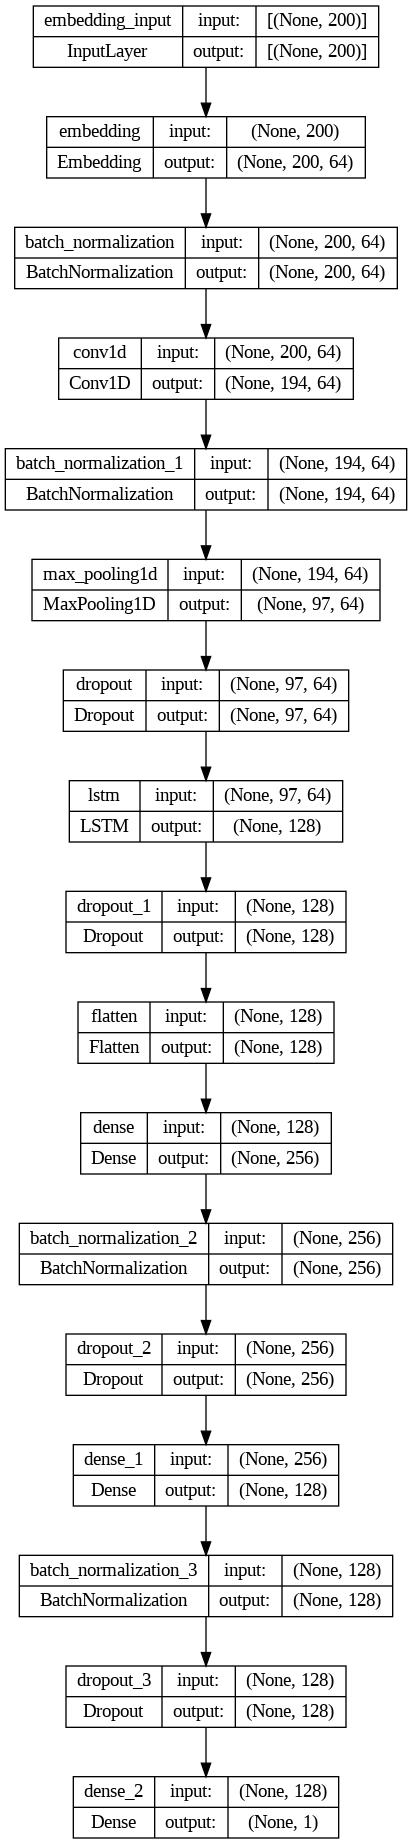

In [21]:
from tensorflow import keras
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)
epochs = 20

checkPoint = ModelCheckpoint('/drive/MyDrive/dataset/model_url_{epoch}.h5', save_freq = 'epoch')
history = model.fit(
    X_train1, y_train,
    validation_split=0.2,
    batch_size=512,
    epochs=epochs,
    callbacks=[early_stopping,checkPoint],
    verbose = 1
)

Epoch 1/20
1449/1449 [==============================] - 68s 40ms/step - loss: 0.0892 - binary_accuracy: 0.9572 - val_loss: 0.0253 - val_binary_accuracy: 0.9919
Epoch 2/20
   3/1449 [..............................] - ETA: 48s - loss: 0.0259 - binary_accuracy: 0.9922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1449/1449 [==============================] - 55s 38ms/step - loss: 0.0201 - binary_accuracy: 0.9946 - val_loss: 0.0237 - val_binary_accuracy: 0.9927
Epoch 3/20
1449/1449 [==============================] - 57s 39ms/step - loss: 0.0172 - binary_accuracy: 0.9957 - val_loss: 0.0143 - val_binary_accuracy: 0.9964
Epoch 4/20
1449/1449 [==============================] - 57s 40ms/step - loss: 0.0155 - binary_accuracy: 0.9962 - val_loss: 0.0205 - val_binary_accuracy: 0.9941
Epoch 5/20
1449/1449 [==============================] - 57s 40ms/step - loss: 0.0146 - binary_accuracy: 0.9964 - val_loss: 0.0145 - val_binary_accuracy: 0.9966
Epoch 6/20
1449/1449 [==============================] - 56s 39ms/step - loss: 0.0137 - binary_accuracy: 0.9967 - val_loss: 0.0129 - val_binary_accuracy: 0.9970
Epoch 7/20
1449/1449 [==============================] - 55s 38ms/step - loss: 0.0131 - binary_accuracy: 0.9968 - val_loss: 0.0149 - val_binary_accuracy: 0.9963
Epoch 8/20
1449/1449 [=============================

Best Validation Loss: 0.0109
Best Validation Accuracy: 0.9976


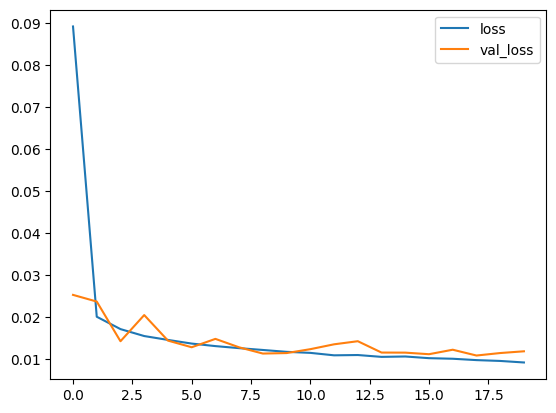

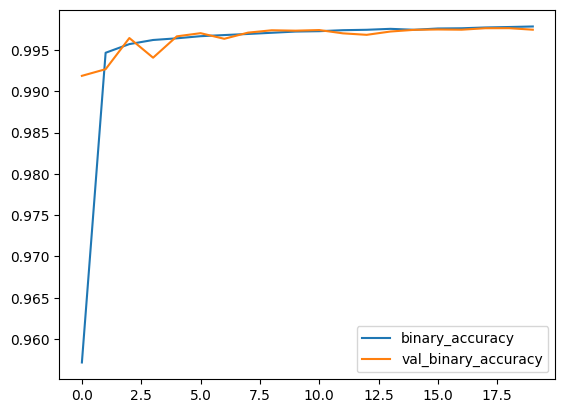

In [24]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 0
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [25]:
model.evaluate(X_test1,y_test)

7243/7243 [==============================] - 31s 4ms/step - loss: 0.0132 - binary_accuracy: 0.9971


[0.01318530272692442, 0.9971178770065308]

In [26]:
from tensorflow import keras
max_test = -1.0
index = 0

for i in range(1, epochs + 1):
  model_name = '/drive/MyDrive/dataset/model_url_' + str(i) + '.h5'
  loaded_model = keras.models.load_model(model_name)
  loss, accuracy = loaded_model.evaluate(X_test1, y_test)
  print(accuracy)
  if accuracy > max_test:
    print(i)
    max_test = accuracy
    index = i
print(index)

7243/7243 [==============================] - 32s 4ms/step - loss: 0.0263 - binary_accuracy: 0.9916
0.9916039109230042
1
7243/7243 [==============================] - 33s 4ms/step - loss: 0.0252 - binary_accuracy: 0.9922
0.9921777844429016
2
7243/7243 [==============================] - 33s 4ms/step - loss: 0.0153 - binary_accuracy: 0.9962
0.9961643815040588
3
7243/7243 [==============================] - 32s 4ms/step - loss: 0.0218 - binary_accuracy: 0.9938
0.9937827587127686
7243/7243 [==============================] - 31s 4ms/step - loss: 0.0150 - binary_accuracy: 0.9965
0.996479332447052
5
7243/7243 [==============================] - 32s 4ms/step - loss: 0.0136 - binary_accuracy: 0.9967
0.996746838092804
6
7243/7243 [==============================] - 32s 4ms/step - loss: 0.0158 - binary_accuracy: 0.9960
0.9960435628890991
7243/7243 [==============================] - 33s 4ms/step - loss: 0.0134 - binary_accuracy: 0.9969
0.9968762993812561
8
7243/7243 [==============================] - 3

In [27]:
import pandas as pd
test_data = ['https://www.youtube.com/watch?v=ODoLZTHMyZk',
             'http://www.bankofamerica-com-login-sys-working-update.com/Update/7cd90061e939fdb2f310b4ee38c53970/signonSetup.php',
             'https://www.facebook.com/watch/?ref=tab',
             'http://www.youtube.com',
            'https://github.com'
             ]

X_test = [text_to_seq(x) for x in test_data]
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

In [28]:
model.predict(X_test)

1/1 [==============================] - 1s 568ms/step


array([[9.9989533e-01],
       [9.9999583e-01],
       [9.9990594e-01],
       [4.8658182e-04],
       [9.9998534e-01]], dtype=float32)

In [29]:
loaded_model1 = keras.models.load_model('/drive/MyDrive/dataset/model_url_' + str(index) + '.h5')
loaded_model1.save(filepath='model_url_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
